In [6]:
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import requests
import pandas as pd

# URL del archivo raw en GitHub
url = "https://raw.githubusercontent.com/Alisser2001/QuantumMachineLearning/emmadev/concrete.dat"

# Descargar el contenido del archivo
response = requests.get(url)
lines = [line.strip() for line in response.text.splitlines()]

# Extraer atributos
attributes = [line.split()[1] for line in lines if line.startswith("@attribute")]

# Extraer datos (después de @data)
data_start = lines.index("@data") + 1
data = [line.split(",") for line in lines[data_start:] if line]

# Crear DataFrame
df = pd.DataFrame(data, columns=attributes).astype(float)

print(df.head())


       Cement  BlastFurnaceSlag      FlyAsh       Water  Superplasticizer  \
0  252.000000               0.0    0.000000  185.000000               0.0   
1  295.799988               0.0    0.000000  185.699997               0.0   
2  252.300003               0.0   98.800003  146.300003              14.2   
3  172.399994              13.6  172.399994  156.800003               4.1   
4  162.000000             214.0  164.000000  202.000000              10.0   

   CoarseAggregate  FineAggregate   Age  ConcreteCompressiveStrength  
0      1111.000000     784.000000   7.0                    13.710000  
1      1091.400024     769.299988   7.0                    14.840000  
2       987.799988     889.000000   3.0                    21.780001  
3      1006.299988     856.400024  28.0                    33.689999  
4       820.000000     680.000000  28.0                    30.650000  


In [7]:
# =========================
# SETUP: paleta 'pastel' (nativa de seaborn) — sin guardado de imágenes
# =========================
import math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

palette_name = "pastel"
sns.set_theme(style="whitegrid", context="notebook", palette=palette_name, font_scale=1.05)
pal = sns.color_palette(palette_name)

# colores explícitos extraídos de la paleta
color_main  = pal[2]    # para histogramas / puntos
color_kde   = pal[1]    # para KDE / líneas suaves
color_accent= pal[-1]   # para líneas de regresión o destaque
box_color   = pal[0]    # para boxplots inset

print("Paleta aplicada:", palette_name, " — Colores:", pal)


Paleta aplicada: pastel  — Colores: [(0.6313725490196078, 0.788235294117647, 0.9568627450980393), (1.0, 0.7058823529411765, 0.5098039215686274), (0.5529411764705883, 0.8980392156862745, 0.6313725490196078), (1.0, 0.6235294117647059, 0.6078431372549019), (0.8156862745098039, 0.7333333333333333, 1.0), (0.8705882352941177, 0.7333333333333333, 0.6078431372549019), (0.9803921568627451, 0.6901960784313725, 0.8941176470588236), (0.8117647058823529, 0.8117647058823529, 0.8117647058823529), (1.0, 0.996078431372549, 0.6392156862745098), (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]


In [8]:
# Vista rápida de los datos
print("Dimensiones:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nDescripción estadística:")
display(df.describe().T)

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nTipo de datos por columna:")
print(df.dtypes)

Dimensiones: (1030, 9)

Primeras filas:


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000



Descripción estadística:


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.000000,192.375000,272.899994,350.000000,540.000000
BlastFurnaceSlag,1030.0,73.895825,86.279341,0.000000,0.000000,22.000000,142.950001,359.399994
FlyAsh,1030.0,54.188350,63.997004,0.000000,0.000000,0.000000,118.300003,200.100006
Water,1030.0,181.567281,21.354218,121.800003,164.899994,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.204660,5.973841,0.000000,0.000000,6.400000,10.200000,32.200001
CoarseAggregate,1030.0,972.918932,77.753955,801.000000,932.000000,968.000000,1029.400024,1145.000000
FineAggregate,1030.0,773.580484,80.175980,594.000000,730.950012,779.500000,824.000000,992.599976
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
ConcreteCompressiveStrength,1030.0,35.817961,16.705742,2.330000,23.710001,34.445002,46.135001,82.599998



Valores nulos por columna:
Cement                         0
BlastFurnaceSlag               0
FlyAsh                         0
Water                          0
Superplasticizer               0
CoarseAggregate                0
FineAggregate                  0
Age                            0
ConcreteCompressiveStrength    0
dtype: int64

Tipo de datos por columna:
Cement                         float64
BlastFurnaceSlag               float64
FlyAsh                         float64
Water                          float64
Superplasticizer               float64
CoarseAggregate                float64
FineAggregate                  float64
Age                            float64
ConcreteCompressiveStrength    float64
dtype: object


confirmamos que no hay valores nulos y que todos son números, por lo tanto no es necesario pensar en una transformación ni en una imputación de datos

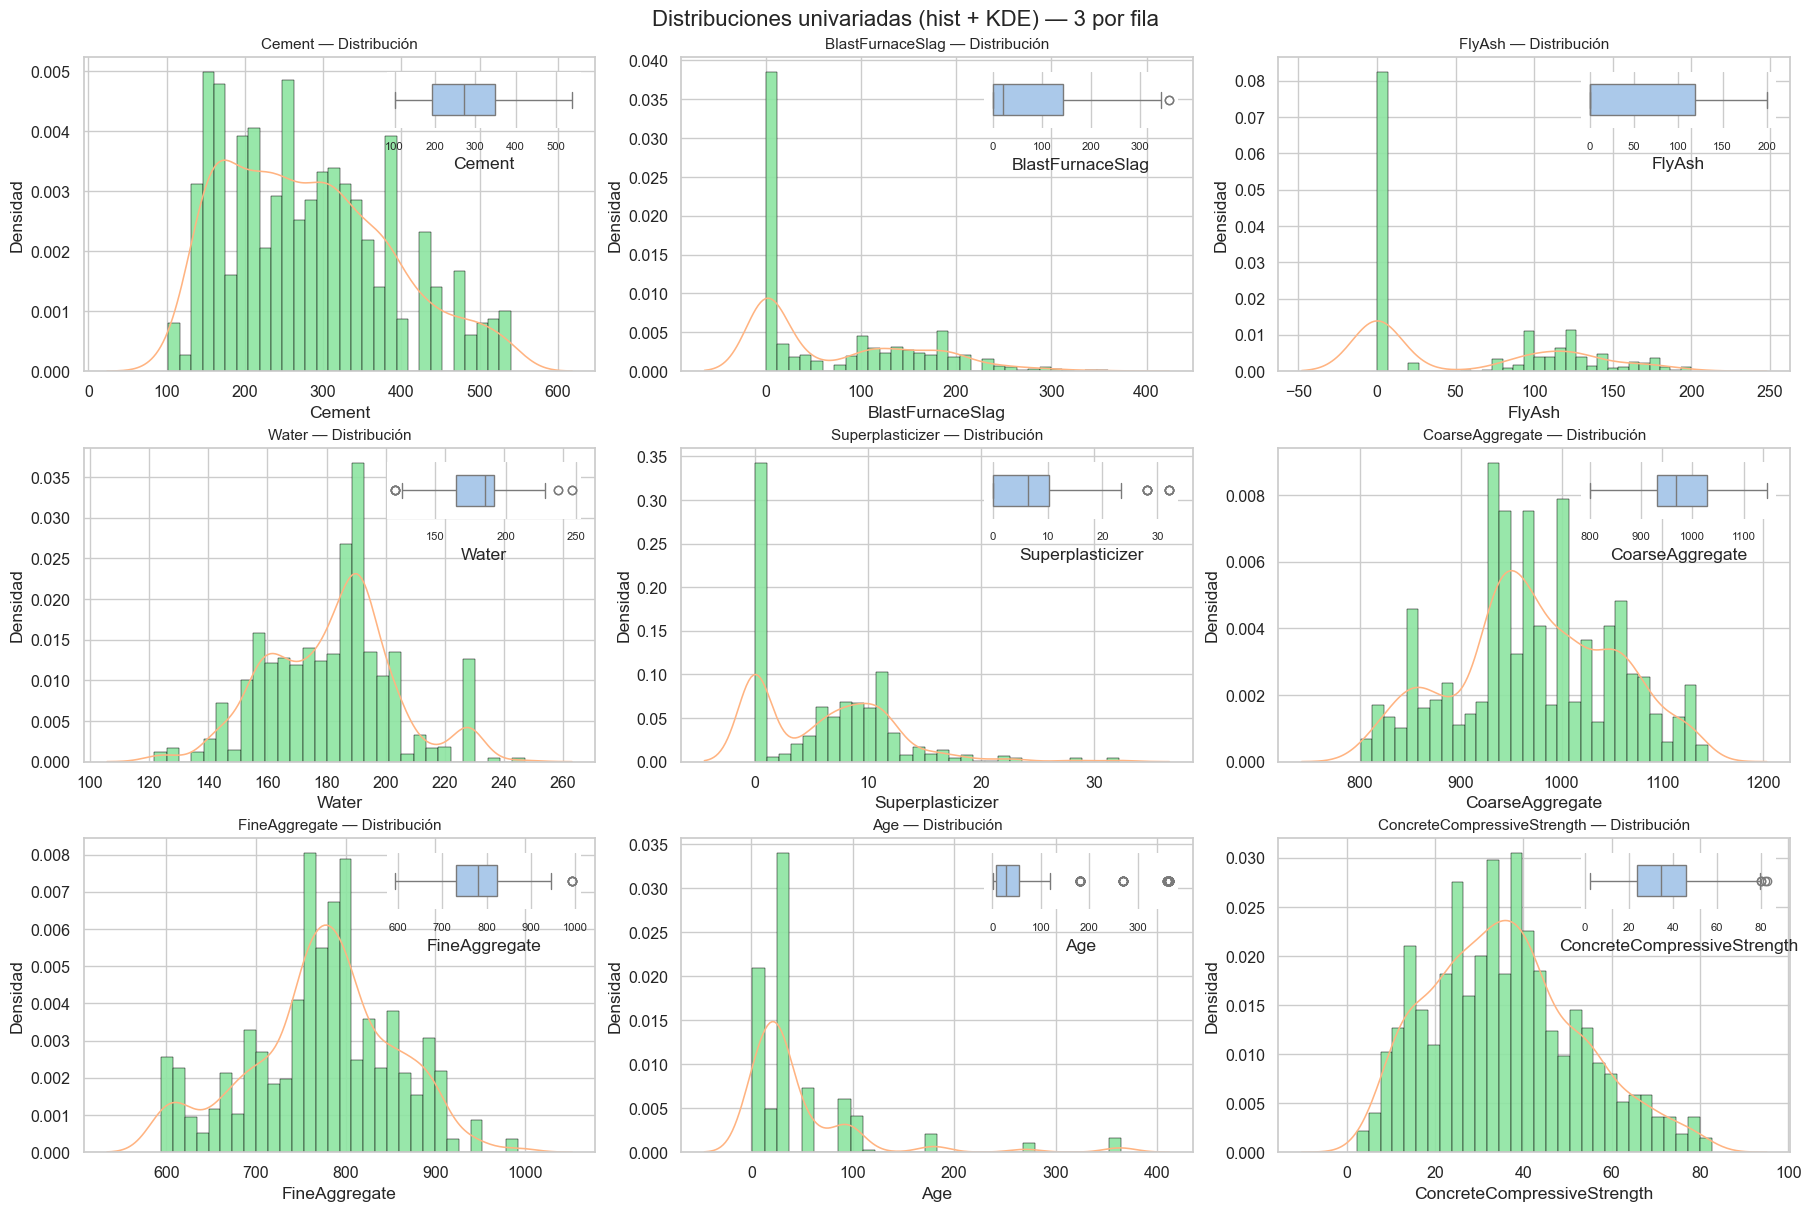

In [9]:
cols = df.columns.tolist()
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")

    axins = inset_axes(ax, width="38%", height="18%", loc='upper right', borderpad=0.9)
    sns.boxplot(x=df[col], ax=axins, orient="h", width=0.55, color=box_color)
    axins.set_yticks([])
    axins.tick_params(axis='both', which='both', labelsize=8)
    for spine in axins.spines.values():
        spine.set_visible(False)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])


fig.suptitle("Distribuciones univariadas (hist + KDE) — 3 por fila", fontsize=16)

plt.show()


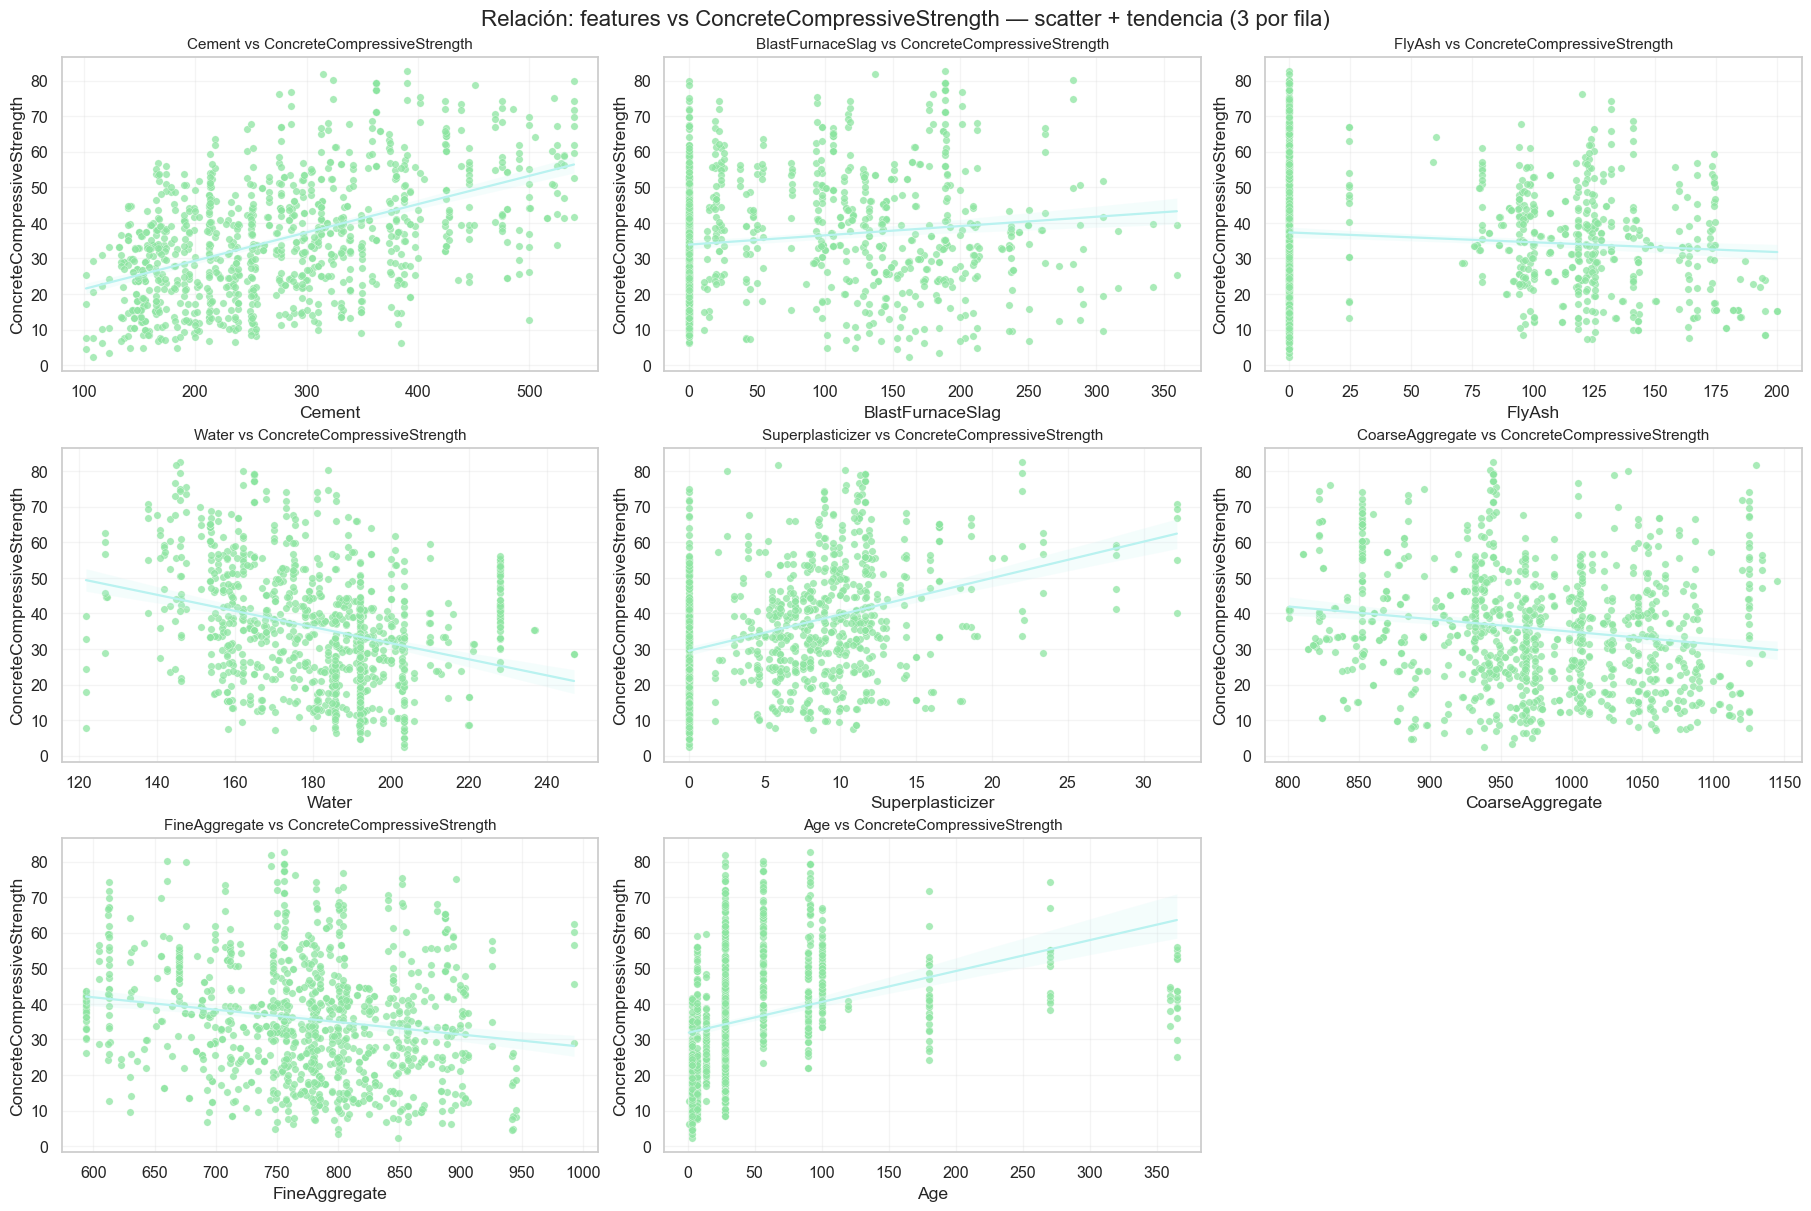

In [10]:
target = "ConcreteCompressiveStrength"
features = [c for c in df.columns if c != target]
n = len(features)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features):
    ax = axes[i]
    sns.scatterplot(x=df[feat], y=df[target], ax=ax,
                    color=color_main, edgecolor="w", linewidth=0.25, s=28, alpha=0.75)
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, truncate=True,
                line_kws={"linewidth":1.6, "color": color_accent})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.grid(alpha=0.2)

for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle(f"Relación: features vs {target} — scatter + tendencia (3 por fila)", fontsize=16)
plt.show()


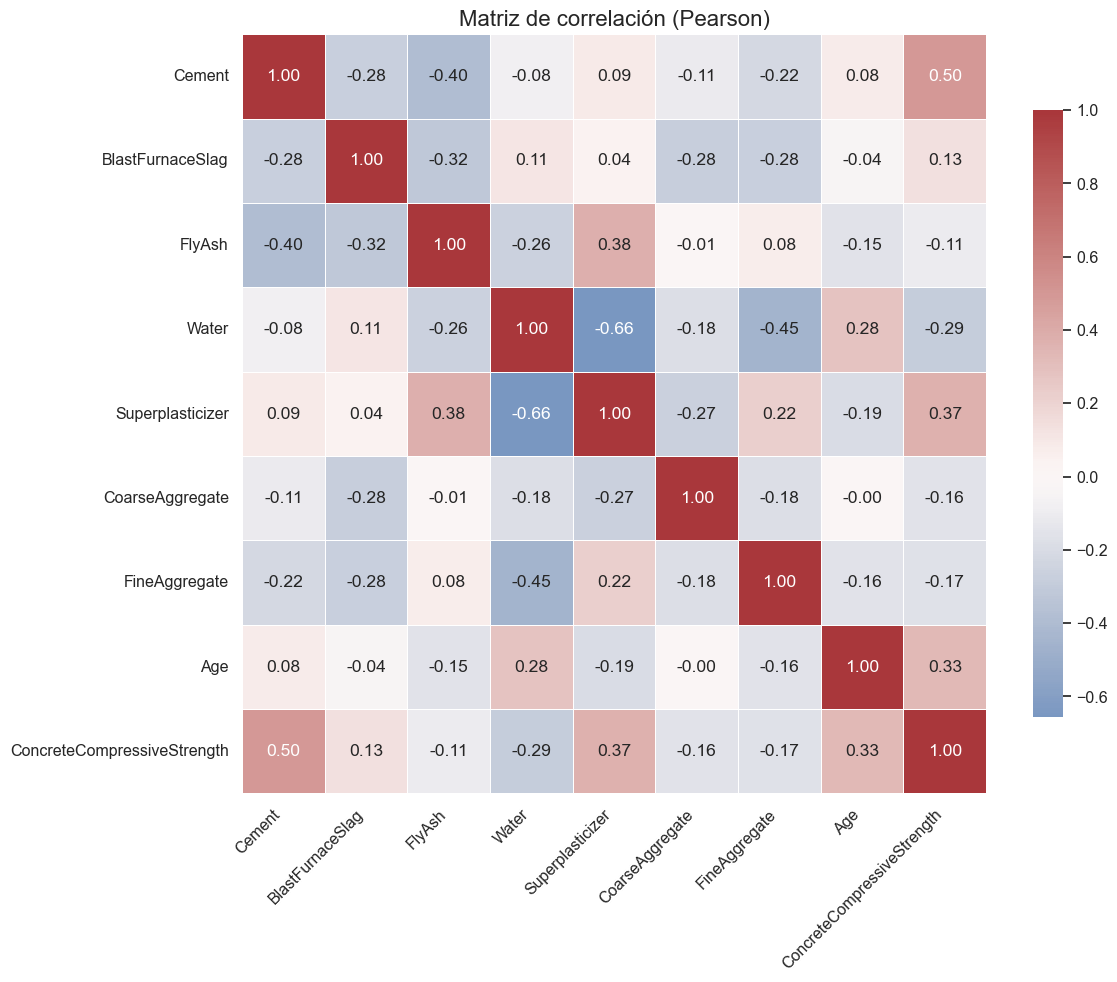


Correlación con la variable objetivo (orden descendente):


ConcreteCompressiveStrength    1.000000
Cement                         0.497832
Superplasticizer               0.366079
Age                            0.328873
BlastFurnaceSlag               0.134829
FlyAsh                        -0.105755
CoarseAggregate               -0.164935
FineAggregate                 -0.167241
Water                         -0.289633
Name: ConcreteCompressiveStrength, dtype: float64

In [11]:
corr = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", center=0, linewidths=0.5, cbar_kws={"shrink":0.8})
plt.title("Matriz de correlación (Pearson)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCorrelación con la variable objetivo (orden descendente):")
display(corr[target].sort_values(ascending=False))





---



In [12]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [13]:

# Parámetros
features = df.columns.tolist()  # lista explícita
n_neighbors = 20               # n_neighbors de LOF
contamination = 0.05           # fracción esperada de outliers

X = df[features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2) Ajustar LOF
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=False)
y_pred = lof.fit_predict(X_scaled)  # 1 -> inlier, -1 -> outlier
neg_lof_scores = lof.negative_outlier_factor_  # valores negativos: más negativo = más atípico
# convertimos a score positivo (cuanto mayor, más atípico)
lof_score = -neg_lof_scores

In [14]:
# Añadir columnas al DataFrame original (no escala)
df = df.copy()  # evitar modificar df original fuera del scope
df["lof_score"] = lof_score
df["is_outlier"] = y_pred == -1

# 4) Resumen rápido
n_outliers = df["is_outlier"].sum()
print(f"Total de muestras: {len(df)}")
print(f"Outliers detectados (is_outlier=True): {n_outliers}  —  Contamination usado: {contamination}")

# Mostrar top N más atípicos (por lof_score)
top_n = 10
print(f"\nTop {top_n} muestras más atípicas (por lof_score):")
display(df.sort_values("lof_score", ascending=False).head(top_n))

# 5) Visualizaciones: univariadas y bivariadas con outliers destacados
cols = features
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

Total de muestras: 1030
Outliers detectados (is_outlier=True): 52  —  Contamination usado: 0.05

Top 10 muestras más atípicas (por lof_score):


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength,lof_score,is_outlier
161,500.000000,0.000000,0.000000,200.000000,0.0,1125.000000,613.000000,1.0,12.640000,1.757744,True
357,485.000000,0.000000,0.000000,146.000000,0.0,1120.000000,800.000000,28.0,71.989998,1.727267,True
44,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,3.0,7.750000,1.699733,True
290,522.000000,0.000000,0.000000,146.000000,0.0,896.000000,896.000000,7.0,50.509998,1.584796,True
105,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,14.0,17.820000,1.578456,True
754,313.000000,0.000000,0.000000,178.000000,8.0,1000.000000,822.000000,28.0,25.100000,1.575527,True
298,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,56.0,32.849998,1.571086,True
557,312.700012,0.000000,0.000000,178.100006,8.0,999.700012,822.200012,28.0,25.100000,1.569516,True
786,436.000000,0.000000,0.000000,218.000000,0.0,838.400024,719.700012,28.0,23.850000,1.566211,True
815,168.000000,42.099998,163.800003,121.800003,5.7,1058.699951,780.099976,100.0,39.230000,1.545307,True


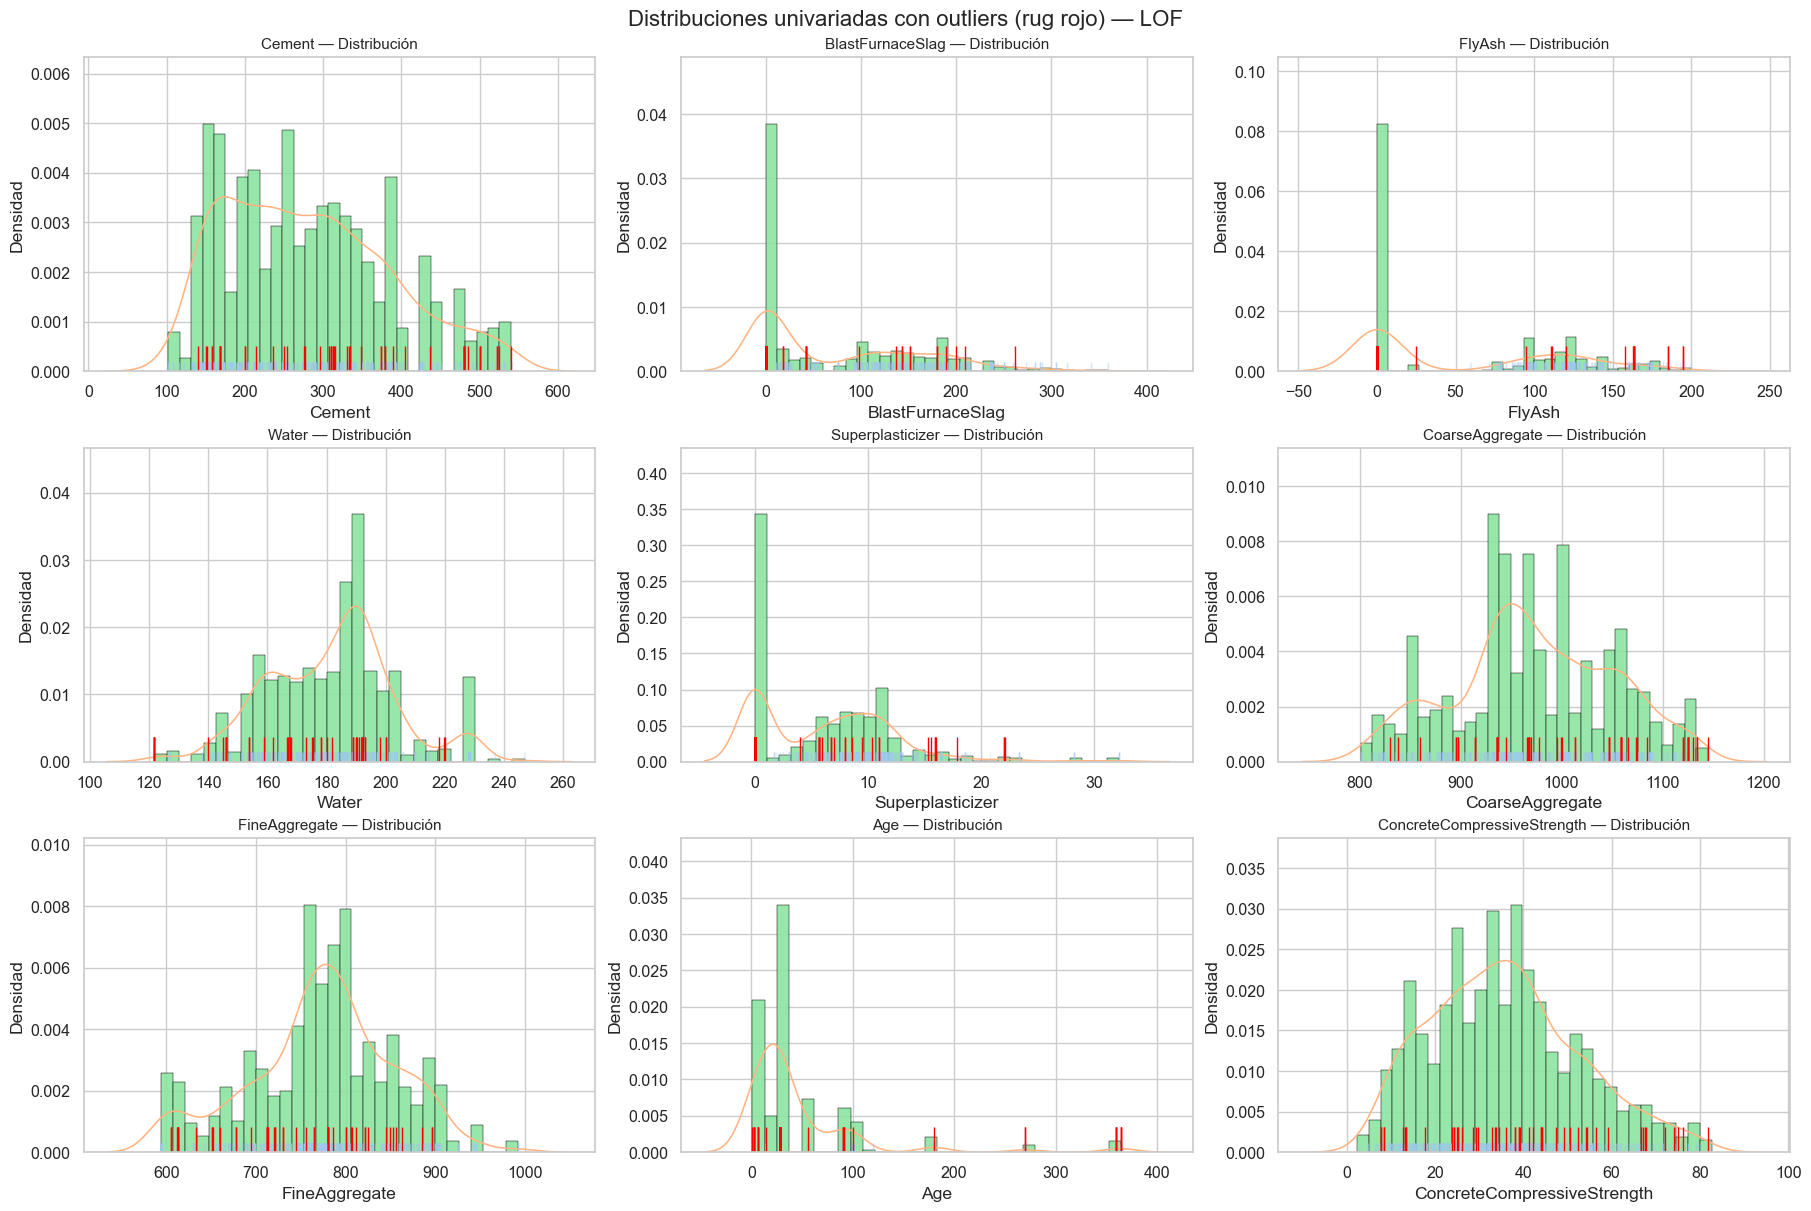

In [15]:

# Distribuciones univariadas: hist + KDE + rug con outliers en rojo
fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, 4*rows), constrained_layout=True)
axes = axes.flatten()

for i, col in enumerate(cols):
    ax = axes[i]
    sns.histplot(df[col], kde=False, bins=30, ax=ax, stat="density",
                 color=color_main, edgecolor="black", linewidth=0.35, alpha=0.9)
    sns.kdeplot(df[col], ax=ax, color=color_kde, linewidth=1.15, fill=False)
    ax.set_title(f"{col} — Distribución", fontsize=11)
    ax.set_ylabel("Densidad")
    # rug para inliers (sutil)
    sns.rugplot(df.loc[~df["is_outlier"], col], ax=ax, height=0.03, alpha=0.25)
    # rug para outliers (destacado en rojo)
    sns.rugplot(df.loc[df["is_outlier"], col], ax=ax, height=0.08, color="red")


for j in range(n, rows*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Distribuciones univariadas con outliers (rug rojo) — LOF", fontsize=16)
plt.show()

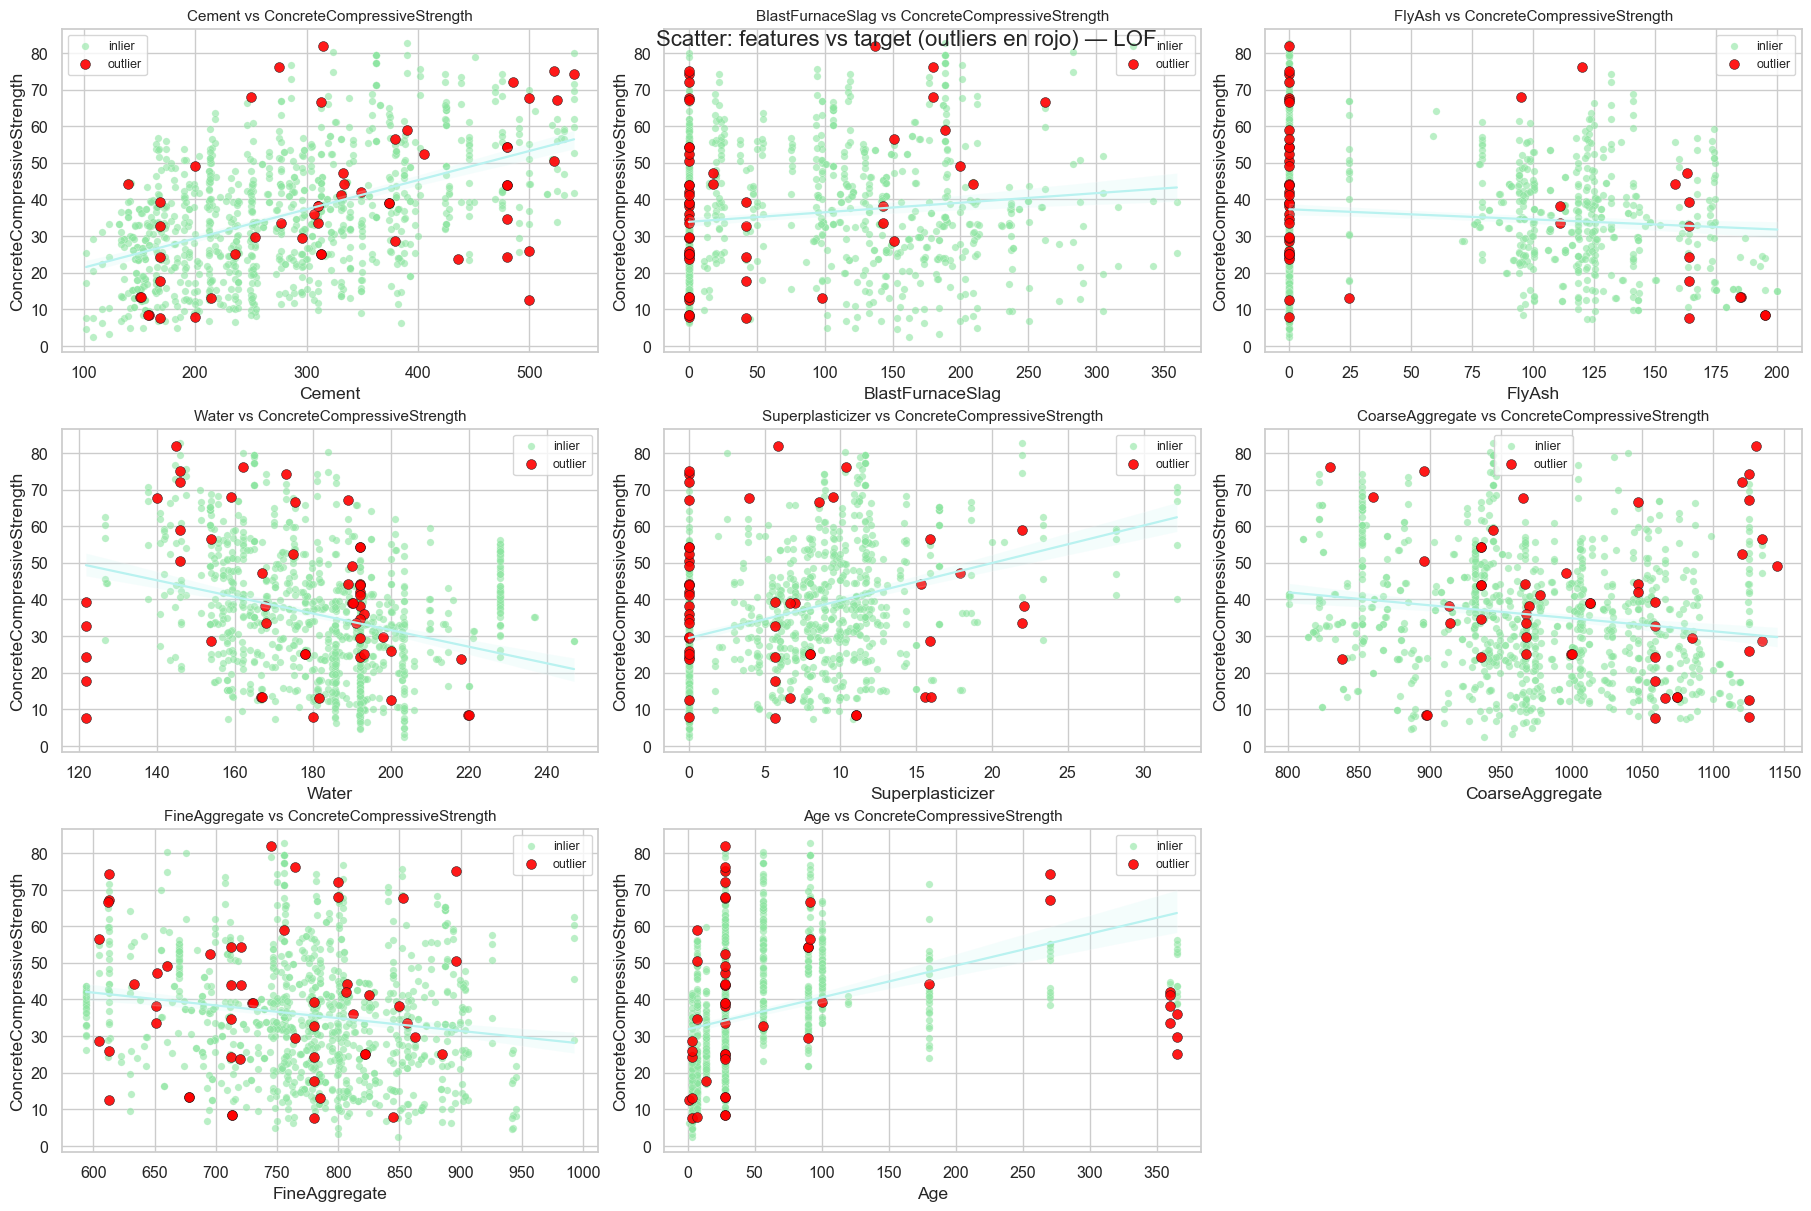

In [16]:
target = "ConcreteCompressiveStrength"
features_no_target = [c for c in features if c != target]
n2 = len(features_no_target)
rows2 = math.ceil(n2 / cols_per_row)

fig, axes = plt.subplots(rows2, cols_per_row, figsize=(18, 4*rows2), constrained_layout=True)
axes = axes.flatten()

for i, feat in enumerate(features_no_target):
    ax = axes[i]
    # plot inliers
    sns.scatterplot(x=df.loc[~df["is_outlier"], feat], y=df.loc[~df["is_outlier"], target],
                    ax=ax, color=color_main, s=28, alpha=0.6, edgecolor="w", linewidth=0.2, label="inlier")
    # plot outliers in red
    sns.scatterplot(x=df.loc[df["is_outlier"], feat], y=df.loc[df["is_outlier"], target],
                    ax=ax, color="red", s=50, alpha=0.9, edgecolor="k", linewidth=0.4, label="outlier")
    # tendencia sobre todos los datos
    sns.regplot(x=df[feat], y=df[target], scatter=False, ax=ax, line_kws={"color": color_accent, "linewidth":1.6})
    ax.set_title(f"{feat} vs {target}", fontsize=11)
    ax.set_xlabel(feat)
    ax.set_ylabel(target)
    ax.legend(loc="best", fontsize=9)

for j in range(n2, rows2*cols_per_row):
    fig.delaxes(axes[j])

fig.suptitle("Scatter: features vs target (outliers en rojo) — LOF", fontsize=16, y=0.98)
plt.show()

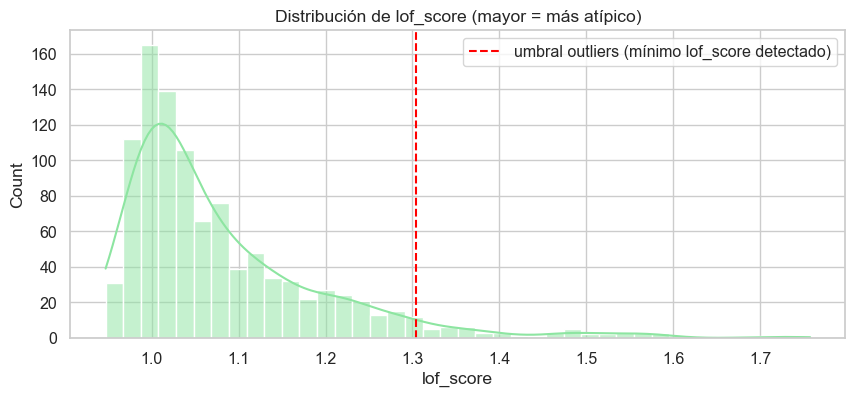

In [17]:
# Mapa de scores LOF (histograma + top outliers)
plt.figure(figsize=(10,4))
sns.histplot(df["lof_score"], bins=40, kde=True, color=color_main)
plt.title("Distribución de lof_score (mayor = más atípico)")
plt.xlabel("lof_score")
plt.axvline(df.loc[df['is_outlier'], 'lof_score'].min(), color="red", linestyle="--",
            label="umbral outliers (mínimo lof_score detectado)")
plt.legend()
plt.show()

In [18]:
# Crear DataFrame solo con outliers
df_outliers = df[df["is_outlier"]].copy()

# Guardar a CSV
outliers_path = "outliers_lof.csv"
df_outliers.to_csv(outliers_path, index=False)

print(f"Archivo con {len(df_outliers)} outliers guardado en: {outliers_path}")


Archivo con 52 outliers guardado en: outliers_lof.csv


In [19]:
# Hiperparámetros a probar
from itertools import product
neighbors_grid = [5, 10, 20, 35, 50]
contamination_grid = [0.01, 0.03, 0.05, 0.1]

results = []

for n_neighbors, contamination in product(neighbors_grid, contamination_grid):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination, novelty=False)
    y_pred = lof.fit_predict(X_scaled)
    lof_score = -lof.negative_outlier_factor_
    n_outliers = (y_pred == -1).sum()
    mean_lof = lof_score[y_pred == -1].mean() if n_outliers > 0 else np.nan

    results.append({
        "n_neighbors": n_neighbors,
        "contamination": contamination,
        "n_outliers": n_outliers,
        "mean_lof_score": mean_lof
    })

df_grid = pd.DataFrame(results)
df_grid = df_grid.sort_values(["n_neighbors", "contamination"]).reset_index(drop=True)

display(df_grid)

,n_neighbors,contamination,n_outliers,mean_lof_score
0,5,0.01,11,2.702629
1,5,0.03,31,2.150139
2,5,0.05,52,1.908367
3,5,0.10,101,1.643853
4,10,0.01,11,1.812548
5,10,0.03,31,1.660854
6,10,0.05,52,1.570823
7,10,0.10,103,1.440127
8,20,0.01,11,1.610984
9,20,0.03,31,1.512386


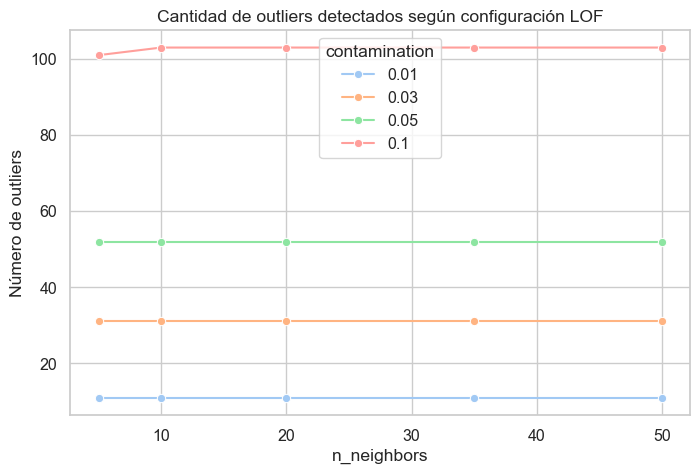

In [20]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df_grid, x="n_neighbors", y="n_outliers",
             hue="contamination", marker="o", palette="pastel")
plt.title("Cantidad de outliers detectados según configuración LOF")
plt.ylabel("Número de outliers")
plt.xlabel("n_neighbors")
plt.legend(title="contamination")
plt.show()


In [21]:
# Crear un DataFrame limpio sin outliers
df_clean = df[~df["is_outlier"]].copy()

print(f"Dataset original: {df.shape[0]} filas")
print(f"Outliers eliminados: {df['is_outlier'].sum()}")
print(f"Dataset limpio: {df_clean.shape[0]} filas")

# Vista rápida de los primeros registros
display(df_clean.head())


Dataset original: 1030 filas
Outliers eliminados: 52
Dataset limpio: 978 filas


,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,ConcreteCompressiveStrength,lof_score,is_outlier
0,252.000000,0.0,0.000000,185.000000,0.0,1111.000000,784.000000,7.0,13.710000,0.986356,False
1,295.799988,0.0,0.000000,185.699997,0.0,1091.400024,769.299988,7.0,14.840000,0.965025,False
2,252.300003,0.0,98.800003,146.300003,14.2,987.799988,889.000000,3.0,21.780001,1.059604,False
3,172.399994,13.6,172.399994,156.800003,4.1,1006.299988,856.400024,28.0,33.689999,1.138188,False
4,162.000000,214.0,164.000000,202.000000,10.0,820.000000,680.000000,28.0,30.650000,1.043368,False


In [22]:
df_clean.to_csv("concrete_cleanLOF.csv", index=False)